# 第十一章 Numpy库

## 11.1 为什么要用Numpy

### 11.1.1 &ensp;低效的Python for循环

【例】 求100万个数的倒数

In [ ]:
def compute_reciprocals(values):
    res = []
    for value in values:      # 每遍历到一个元素，就要判断其类型，并查找适用于该数据类型的正确函数
        res.append(1/value)
    return res


values = list(range(1, 1000000))
%timeit compute_reciprocals(values)

%timeit ：ipython中统计运行时间的魔术方法（多次运行取平均值）

In [ ]:
import numpy as np

values = np.arange(1, 1000000)
%timeit 1/values

**实现相同计算，Numpy的运行速度是Python循环的25倍，产生了质的飞跃**

### 11.1.2 &ensp;Numpy为什么如此高效

**Numpy 是由C语言编写的**

**1、编译型语言VS解释型语言**

C语言执行时，对代码进行整体编译，速度更快

**2、连续单一类型存储VS分散多变类型存储**

（1）Numpy数组内的数据类型必须是统一的，如全部是浮点型，而Python列表支持任意类型数据的填充
  
（2）Numpy数组内的数据**连续存储在内存中**，而Python列表的数据**分散在内存中**
  
 &emsp; **这种存储结构，与一些更加高效的底层处理方式更加的契合**

**3、多线程VS线程锁**

Python语言执行时有线程锁，无法实现真正的多线程并行，而C语言可以

### 11.1.3 &ensp;什么时候用Numpy

**在数据处理的过程中，遇到使用“Python for循环” 实现一些向量化、矩阵化操作的时候，要优先考虑用Numpy**

如：  1、两个向量的点乘  
  
&emsp;  &emsp;2、矩阵乘法  

## 11.2 Numpy数组的创建

### 11.2.1 从列表开始创建

In [1]:
import numpy as np

x = np.array([1, 2, 3, 4, 5])
print(x)

ModuleNotFoundError: No module named 'numpy'

In [ ]:
print(type(x))
print(x.shape)

* 设置数组的数据类型

In [ ]:
x = np.array([1, 2, 3, 4, 5], dtype="float32")
print(x)
print(type(x[0]))

* 二维数组

In [ ]:
x = np.array([[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]])
print(x)
print(x.shape)

### 11.2.2 从头创建数组

**（1）创建长度为5的数组，值都为0**

In [ ]:
np.zeros(5, dtype=int)

**（2）创建一个2*4的浮点型数组，值都为1**

In [ ]:
np.ones((2, 4), dtype=float)

**（3）创建一个3*5的数组，值都为8.8**

In [ ]:
np.full((3, 5), 8.8) # memset(?)

**（4）创建一个3*3的单位矩阵**

In [ ]:
np.eye(3)

**（5）创建一个线性序列数组，从1开始，到15结束，步长为2**

In [ ]:
np.arange(1, 15, 2)

**（6）创建一个4个元素的数组，这四个数均匀的分配到0~1**

In [ ]:
np.linspace(0, 1, 4)

**（7）创建一个10个元素的数组，形成1~10^9的等比数列**

In [ ]:
np.logspace(0, 9, 10)

**（8）创建一个3*3的，在0~1之间均匀分布的随机数构成的数组**

In [ ]:
np.random.random((3,3))

**（9）创建一个3*3的，均值为0，标准差为1的正态分布随机数构成的数组**

In [ ]:
np.random.normal(0, 1, (3,3))

**（10）创建一个3*3的，在[0,10)之间随机整数构成的数组**

In [ ]:
np.random.randint(0, 10, (3,3))

**（11）随机重排列**

In [ ]:
x = np.array([10, 20, 30, 40])
np.random.permutation(x)       # 生产新列表

In [ ]:
print(x)
np.random.shuffle(x)          # 修改原列表
print(x)

**（12）随机采样**

* 按指定形状采样

In [ ]:
x = np.arange(10, 25, dtype = float)
x

In [ ]:
np.random.choice(x, size=(4, 3))

In [ ]:
import numpy as np
np.random.choice(10, 10)

In [ ]:
x = np.arange(5).reshape(1, 5)
x
#x.sum(axis=1, keepdims=True)

* 按概率采样

In [ ]:
x = np.arange(5)
np.random.choice(x, size=(4, 3), p=x/np.sum(x))

## 11.3 Numpy数组的性质

### 11.3.1 数组的属性

In [ ]:
x = np.random.randint(10, size=(3, 4))
x

**1、数组的形状shape**

In [ ]:
x.shape

**2、数组的维度ndim**

In [ ]:
x.ndim

In [ ]:
y = np.arange(10)
y

In [ ]:
y.ndim

**3、数组的大小size**

In [ ]:
x.size
#y.size

**4、数组的数据类型dtype**

In [ ]:
x.dtype

### 11.3.2 数组索引

**1、一维数组的索引**

In [ ]:
x1 = np.arange(10)
x1

In [ ]:
x1[0]

In [ ]:
x1[5]

In [ ]:
x1[-1]

**2、多维数组的索引——以二维为例**

In [ ]:
x2 = np.random.randint(0, 20, (2,3))
x2

In [ ]:
x2[0, 0]  #pascal matlab

In [ ]:
x2[0][0]

**注意：numpy数组的数据类型是固定的，向一个整型数组插入一个浮点值，浮点值会向下进行取整**

In [ ]:
x2[0, 0] = 1.618

In [ ]:
x2

### 11.3.3 数组的切片

**1、一维数组——跟列表一样**

In [ ]:
x1 = np.arange(10)
x1

In [ ]:
x1[:3]

In [ ]:
x1[3:]

In [ ]:
x1[::-1]

**2、多维数组——以二维为例**

In [ ]:
x2 = np.random.randint(20, size=(3,4)) 
x2

In [ ]:
x2[:2, :3]             # 前两行，前三列

In [ ]:
x2[:2, 0:3:2]       # 前两行 前三列（每隔一列）

In [ ]:
x2[::-1, ::-1]

**3、获取数组的行和列**

In [ ]:
x3 = np.random.randint(20, size=(3,4)) 
x3

In [ ]:
x3[1, :]   #第一行  从0开始计数

In [ ]:
x3[1]    # 第一行简写

In [ ]:
x3[:, 2]  # 第二列   从0开始计数

**4、切片获取的是视图，而非副本**

In [ ]:
x4 = np.random.randint(20, size=(3,4)) 
x4

In [ ]:
x5 = x4[:2, :2]
x5

**注意：视图元素发生修改，则原数组亦发生相应修改**

In [ ]:
x5[0, 0] = 0
x5

In [ ]:
x4

**修改切片的安全方式：copy**

In [ ]:
x4 = np.random.randint(20, size=(3,4)) 
x4

In [ ]:
x6 = x4[:2, :2].copy()
x6

In [ ]:
x6[0, 0] = 0
x6

In [ ]:
x4

### 11.3.4 数组的变形

In [ ]:
x5 = np.random.randint(0, 10, (1,12))
print(x5)

x5 = np.random.randint(0, 10, (12,))
print(x5)

In [ ]:
x5.shape[0] # 建立一个一维矩阵x5, x5.shape 为矩阵的长度

In [ ]:
x6 = x5.reshape(3, 4)
x6
#x6.shape
#x6.shape[1]


**注意：reshape返回的是视图，而非副本**

In [ ]:
x6[0, 0] = 0
x5


**一维向量转行向量**

In [ ]:
print(x5.shape[0])
x7 = x5.reshape(1, x5.shape[0])    
x7

In [ ]:
#np.newaxis 的功能是增加新的维度，np.newaxis 放的位置不同，产生的矩阵形状也不同。
x8 = x5[np.newaxis, :]  
x8

**一维向量转列向量**

In [ ]:
x7 = x5.reshape(x5.shape[0], 1)    
x7


In [ ]:
x8 = x5[:, np.newaxis]
x8

**多维向量转一维向量**

In [ ]:
x6 = np.random.randint(0, 10, (3, 4))
x6

**flatten返回的是副本**

In [ ]:
x9 = x6.flatten()
x9

In [ ]:
x9[0]=0
x6

**ravel返回的是视图**

In [ ]:
x10 = x6.ravel()
x10

In [ ]:
x10[0]=0
x6

**reshape返回的是视图**

In [ ]:
x6
x11 = x6.reshape(-1)
x11

In [ ]:
x11[0]=10
x6

### 11.3.5 数组的拼接

In [ ]:
x1 = np.array([[1, 2, 3],
              [4, 5, 6]])
x2 = np.array([[7, 8, 9],
              [0, 1, 2]])

**1、水平拼接——非视图**

In [ ]:
x3 = np.hstack([x1, x2])
x3

In [ ]:
x3[0][0] = 0
x1
#x3

In [ ]:
x4 = np.c_[x1, x2]
x4

In [ ]:
x4[0][0] = 0
x1

**2、垂直拼接——非视图**

In [ ]:
x1 = np.array([[1, 2, 3],
              [4, 5, 6]])
x2 = np.array([[7, 8, 9],
              [0, 1, 2]])

In [ ]:
x5 = np.vstack([x1, x2])
x5

In [ ]:
x6 = np.r_[x1, x2]
x6

### 11.3.6 数组的分裂

**1、split的用法**

In [ ]:
x6 = np.arange(15)
x6

In [ ]:
x1, x2, x3 ,x4= np.split(x6, [2, 7,10])
print(x1, x2, x3,x4)

**2、hsplit的用法**

In [ ]:
x7 = np.arange(1, 26).reshape(5, 5)
x7

In [ ]:
left, middle, right = np.hsplit(x7, [2,4])
print("left:\n", left)            # 第0~1列
print("middle:\n", middle)        # 第2~3列
print("right:\n", right)          # 第4列

**3、vsplit的用法**

In [ ]:
x7 = np.arange(1, 26).reshape(5, 5)
x7

In [ ]:
upper, middle, lower = np.vsplit(x7, [2,4])
print("upper:\n", upper)         # 第0~1行
print("middle:\n", middle)       # 第2~3行
print("lower:\n", lower)         # 第4行

## 11.4 Numpy四大运算

### 11.4.1 向量化运算

**1、与数字的加减乘除等**

In [ ]:
x1 = np.arange(1,6)
x1

In [ ]:
print("x1+5", x1+5)
print("x1-5", x1-5)
print("x1*5", x1*5)
print("x1/5", x1/5)

In [ ]:
print("-x1", -x1)
print("x1**2", x1**2)
print("x1//2", x1//2)
print("x1%2", x1%2)

**2、绝对值、三角函数、指数、对数**

（1）绝对值

In [ ]:
x2 = np.array([1, -1, 2, -2, 0])
x2

In [ ]:
abs(x2)

In [ ]:
np.abs(x2)

（2）三角函数

In [ ]:
theta = np.linspace(0, np.pi, 5)
theta

In [ ]:
print("sin(theta)", np.sin(theta))
print("con(theta)", np.cos(theta))
print("tan(theta)", np.tan(theta))

In [ ]:
x = [1, 0 ,-1]
print("arcsin(x)", np.arcsin(x))
print("arccon(x)", np.arccos(x))
print("arctan(x)", np.arctan(x))

（3）指数运算

In [ ]:
x = np.arange(3)
x

In [ ]:
np.exp(x)

（4）对数运算

In [ ]:
x = np.array([1, 2, 4, 8 ,10])
print("ln(x)", np.log(x))
print("log2(x)", np.log2(x))
print("log10(x)", np.log10(x))

**3、两个数组的运算**

In [ ]:
x1 = np.arange(1,6)
x1

In [ ]:
x2 = np.arange(6,11)
x2

In [ ]:
print("x1+x2:", x1+x2)
print("x1-x2:", x1-x2)
print("x1*x2:", x1*x2)
print("x1/x2:", x1/x2)

### 11.4.2 矩阵运算

In [ ]:
x = np.arange(9).reshape(3, 3)
x

* 矩阵的转置

In [ ]:
y = x.T
y

* 矩阵乘法

In [ ]:
x = np.array([[1, 0],
             [1, 1]])
y = np.array([[0, 1],
             [1, 1]])

In [ ]:
x.dot(y)

In [ ]:
np.dot(x, y)

In [ ]:
y.dot(x)

In [ ]:
np.dot(y, x)

**注意跟x*y的区别**

In [ ]:
x*y

### 11.4.3 广播运算

In [ ]:
x = np.arange(3).reshape(1, 3)
x

In [ ]:
x+5

**规则**

如果两个数组的形状在维度上不匹配
  
那么数组的形式会沿着维度为1的维度进行扩展以匹配另一个数组的形状。
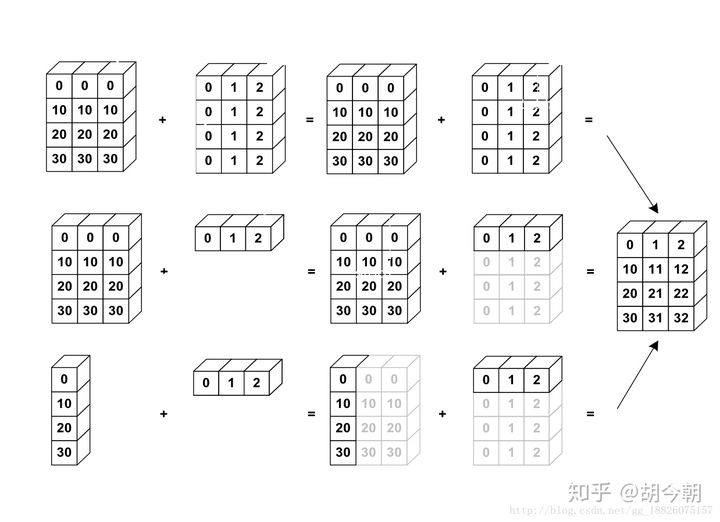

In [ ]:
x1 = np.ones((3,3))
x1

In [ ]:
x2 = np.arange(3).reshape(1, 3)
x2

In [ ]:
x1+x2

In [ ]:
x3 = np.logspace(1, 10, 10, base=2).reshape(2, 5)
x3

In [ ]:
x4 = np.array([[1, 2, 4, 8, 16]])
x4

In [ ]:
x3/x4

In [ ]:
x5 = np.arange(3).reshape(3, 1)
x5

In [ ]:
x6 = np.arange(3).reshape(1, 3)
x6

In [ ]:
x5+x6

### 11.4.4 比较运算和掩码

**1、比较运算**

In [ ]:
x1 = np.random.randint(100, size=(10,10))
x1

In [ ]:
x1 > 50

**2、操作布尔数组**

In [ ]:
x2 = np.random.randint(10, size=(3, 4))
x2

In [ ]:
print(x2 > 5)
np.sum(x2 > 5)

In [ ]:
np.all(x2 > 0)

In [ ]:
np.any(x2 == 6)

In [ ]:
np.all(x2 < 8, axis=1)   # 按行进行判断

In [ ]:
x2

In [ ]:
(x2 < 9) & (x2 >5)

In [ ]:
np.sum((x2 < 9) & (x2 >5))

**3、将布尔数组作为掩码**

In [ ]:
x2

In [ ]:
x2 > 5

In [ ]:
x2[x2 > 5]

### 11.4.5  花哨的索引

**1、一维数组**

In [ ]:
x = np.random.randint(100, size=10)
x

**注意：结果的形状与索引数组ind一致**

In [ ]:
ind = [2, 6, 9]
x[ind]

In [ ]:
ind = np.array([[1, 0],
               [2, 3]])
x[ind]

**2、多维数组**

In [ ]:
x = np.arange(12).reshape(3, 4)
x

In [ ]:
row = np.array([0, 1, 2])
col = np.array([1, 3, 0])
w=x[row, col]               # w=[x(0, 1) x(1, 3) x(2, 0)]
w

In [ ]:
row[:, np.newaxis]       # 列向量

In [ ]:
x[row[:, np.newaxis], col]    # 按照col=[1, 3, 0]取列,进行广播机制

## 11.5 其他Numpy通用函数

### 11.5.1  数值排序

In [ ]:
x = np.random.randint(20, 50, size=10)
x

* 产生新的排序数组

In [ ]:
np.sort(x)

In [ ]:
x

* 替换原数组

In [ ]:
x.sort()
x

* 获得排序索引

In [ ]:
x = np.random.randint(20, 50, size=10)


In [ ]:
i = np.argsort(x)
i

### 11.5.2  最大最小值

In [ ]:
x = np.random.randint(20, 50, size=10)
x

In [ ]:
print("max:", np.max(x))
print("min:", np.min(x))

In [ ]:
print("max_index:", np.argmax(x))
print("min_index:", np.argmin(x))

### 11.5.3  数值求和、求积

In [ ]:
x = np.arange(1,6)
x

In [ ]:
x.sum()

In [ ]:
np.sum(x)

In [ ]:
x1 = np.arange(6).reshape(2,3)
x1

* 按行求和,把一行的列加起来

In [ ]:
np.sum(x1, axis=1)

* 按列求和 把一列的各行加起来

In [ ]:
np.sum(x1, axis=0)

* 全体求和

In [ ]:
np.sum(x1)

* 求积

In [ ]:
x

In [ ]:
x.prod()

In [ ]:
np.prod(x)

### 11.5.4  中位数、均值、方差、标准差

In [ ]:
x = np.random.normal(0, 1, size=100000)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(x, bins=50)
plt.show()

* 中位数

In [ ]:
np.median(x)

* 均值

In [ ]:
x.mean()

In [ ]:
np.mean(x)

* 方差

In [ ]:
x.var()

In [ ]:
np.var(x)

* 标准差

In [ ]:
x.std()

In [ ]:
np.std(x)